# Final Exam - Open

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

***

# Instructions

## Please note the following:

Points
* The exam is `85` points.
* You have `85` minutes to complete the exam.
* For every minute late you submit the exam, you will lose one point.


Submission
* You will upload your solution to the `Final - Open` assignment on Canvas, where you downloaded this. 
* Be sure to **submit** on Canvas, not just **save** on Canvas.
* Your submission should be readable, (the graders can understand your answers.)
* Your submission should **include all code used in your analysis in a file format that the code can be executed.** 

Rules
* The exam is open-material, closed-communication.
* You do not need to cite material from the course github repo - you are welcome to use the code posted there without citation.

Advice
* If you find any question to be unclear, state your interpretation and proceed. We will only answer questions of interpretation if there is a typo, error, etc.
* The exam will be graded for partial credit.

## Data

**All data files are found in the class github repo, in the `data` folder.**

- For Section 1:
    * `data/final_exam_data.xlsx`
- for Section 2:
    * `data/fx_rf_data.xlsx`

## Scoring

| Problem | Points |
|---------|--------|
| 1       | 40     |
| 2       | 45     |

In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

### Each numbered question is worth 5 points unless otherwise specified.

***

# 1. Cross-Sectional Factor Pricing

Use the data found in the file `final_data.xlsx`. The sheet named `Asset Returns` contains daily excess returns data for various assets; the sheet named `Factor Returns` contains daily excess returns data for some unknown factor; and the sheet named `Asset Betas` contains the betas of each asset with respect to the given factor.

Consider the data to have an annualization factor of `252` days per year.

### 1.
(10pts)

Using linear regression, estimate the factor risk premium for __each point in time__, using the following model: $\phantom{Brian Hood}$ 

$$
\tilde{r}^{(i)}_t = \beta^{(i)}\lambda_t + \epsilon^{(i)}_t
$$

Using your estimated series $\lambda_t$, report...

* the last 3 values. 

* the annualized mean.

* the annualized vol.

In [2]:
df_asset_returns = pd.read_excel('../data/final_exam_data.xlsx', sheet_name='Asset Returns').set_index('Date')
df_asset_returns.head()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-03,-0.054703,-0.036458,-0.007488,0.004005,-0.007882,-0.003004,0.018398,-0.025943,-0.014274,-0.023866,...,0.002834,-0.020983,-0.006025,0.001733,0.008402,-0.018563,0.000543,-0.007579,-0.057691,-0.018518
2024-01-04,-0.001220,0.010811,-0.012700,0.006232,0.002249,0.013331,0.006888,-0.002456,-0.008290,-0.015294,...,-0.004738,-0.013799,0.001914,0.002359,-0.008719,0.006902,-0.003176,-0.002241,0.001782,0.005753
2024-01-05,-0.003359,0.038961,-0.004013,0.004211,0.016901,-0.001622,-0.008519,-0.001394,-0.004321,0.002580,...,-0.002589,0.002679,0.015285,0.000000,0.003030,-0.001602,-0.002720,-0.001830,-0.001107,0.004174
2024-01-08,0.021599,0.072059,0.024175,-0.004379,0.030152,0.014440,0.004036,0.011081,0.028250,0.013026,...,0.013815,0.010986,0.014637,-0.002354,-0.016662,0.006242,0.002338,0.016586,0.033242,0.006672
2024-01-09,-0.020243,-0.013717,-0.002263,0.005451,-0.003926,0.002936,-0.012578,0.007052,0.009732,0.004127,...,-0.009498,-0.009104,-0.018444,-0.004876,-0.012386,-0.006557,-0.003265,-0.000820,-0.017810,-0.001071


In [3]:
df_factor_returns = pd.read_excel('../data/final_exam_data.xlsx', sheet_name='Factor Returns').set_index('Date')
df_factor_returns.head()

,factor
Date,
2024-01-03,-0.013855
2024-01-04,-0.001325
2024-01-05,0.002717
2024-01-08,0.011078
2024-01-09,-0.004448


In [4]:
df_asset_betas = pd.read_excel('../data/final_exam_data.xlsx', sheet_name='Asset Betas')
df_asset_betas.head()

,Ticker,betas
0,A,1.180943
1,AAL,1.986505
2,AAPL,0.670563
3,ABBV,0.424427
4,ABNB,1.243492


In [5]:
# Note: Since the given models has no intercept, I am running an OLS regression without intercept.
df_asset_betas = df_asset_betas.set_index('Ticker')
df_asset_returns = df_asset_returns[df_asset_betas.index]

betas_2d = df_asset_betas['betas'].values.reshape(-1, 1)

lambda_values = []

for date, row in df_asset_returns.iterrows():
    y = row.values  
    X = betas_2d     
    
    model = sm.OLS(y, X)
    results = model.fit()
    
    lambda_t = results.params[0]
    lambda_values.append(lambda_t)

lambda_series = pd.Series(lambda_values, index=df_asset_returns.index)

last_3_values = lambda_series.iloc[-3:]
annual_factor = 252
annualized_mean = lambda_series.mean() * annual_factor
annualized_vol = lambda_series.std() * np.sqrt(annual_factor)

print("Last 3 λ values:")
print(last_3_values)
print("Annualized mean of λ:", annualized_mean)
print("Annualized volatility of λ:", annualized_vol)

Last 3 λ values:
Date
2024-11-06    0.022971
2024-11-07    0.001064
2024-11-08    0.001768
dtype: float64
Annualized mean of λ: 0.1754874142533425
Annualized volatility of λ: 0.11688953313031768


### 2.

(10pts)

Compare $\lambda_t$ to the realized factor returns, $\tilde{f}_t$.

* Plot the cumulative (excess) returns of $\lambda_t$ and $\tilde{f}_t$.
* Report the correlation between these two series.
* Report the serial correlation of each series.

Should we expect the serial correlation of $\tilde{f}$ to be near zero? What about $\lambda_t$?

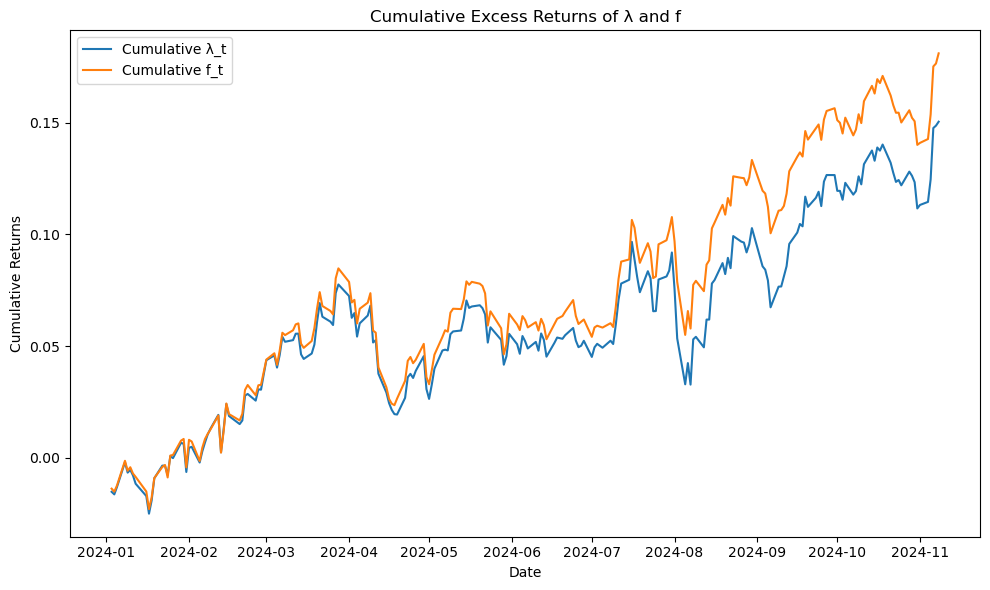

Correlation between λ_t and f_t: 0.9851319641635836
Serial Correlation of λ_t: 0.0015639909104251644
Serial Correlation  of f_t: 0.018437949835348754


In [6]:
factor_returns = df_factor_returns['factor']

lambda_cum = lambda_series.cumsum()
factor_cum = factor_returns.cumsum()

plt.figure(figsize=(10,6))
plt.plot(lambda_cum, label='Cumulative λ_t')
plt.plot(factor_cum, label='Cumulative f_t')
plt.title('Cumulative Excess Returns of λ and f')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.tight_layout()
plt.show()

correlation = lambda_series.corr(factor_returns)
print("Correlation between λ_t and f_t:", correlation)

lambda_autocorr = lambda_series.autocorr(lag=1)
factor_autocorr = factor_returns.autocorr(lag=1)

print("Serial Correlation of λ_t:", lambda_autocorr)
print("Serial Correlation  of f_t:", factor_autocorr)

We typically expect factor returns f_t to have near-zero serial correlation (i.e., white noise). 
λ_t, as a risk premium estimate, may exhibit some persistence and thus may have a nonzero serial correlation.

### 3.

We estimated our factor premium in a regression that excluded an intercept term. Why might we have done this? In what circumstance would we prefer to include an intercept term?

For Excluding the Intercept:
- In a single-factor model (like CAPM), a zero-beta asset should earn no excess return, making an intercept theoretically unnecessary.
- The absence of an intercept forces the cross-sectional regression line through the origin, directly linking returns to factor exposures as theory dictates.
  
When to Include an Intercept:
-  If zero-beta portfolios persistently earn nonzero returns, an intercept can reveal missing variables or structural biases in the model.
- Adding an intercept can help identify and measure average performance components not explained by the factor, guiding more comprehensive factor modeling.

### 4.

(10pts)

Now, use the actual factor returns, $\tilde{f}_t$to analyze the fit of this pricing model using a __single__ cross-sectional regression to estimate  $\phantom{Brian Hood}$

$$
E[r^{(i)}] = \eta + \beta^{(i)} E[\tilde{f}] + \epsilon^{(i)}
$$

How well does this factor work for pricing? Provide supporting evidence for your answer.

In [7]:
mean_asset_returns = df_asset_returns.mean()
mean_factor = df_factor_returns['factor'].mean()  

betas = df_asset_betas['betas']  

X = sm.add_constant(betas.values)  
y = mean_asset_returns.values

model = sm.OLS(y, X)
results = model.fit()

intercept = results.params[0]
slope = results.params[1]
r_squared = results.rsquared

print("Intercept (η):", intercept)
print("Slope coefficient (should approximate E[f]):", slope)
print("Mean factor return (E[f]):", mean_factor)
print("R-squared:", r_squared)
# print(results.summary())

Intercept (η): 0.0007940771564678899
Slope coefficient (should approximate E[f]): 4.3985253866359134e-05
Mean factor return (E[f]): 0.000838062410334249
R-squared: 0.0003091645363348938


These results imply the factor pricing model, as specified, provides almost no explanatory power for the cross-section of asset returns. The intercept is small but not negligible, the slope is far from the expected mean factor return, and the R-squared is extremely low. In summary, this factor alone does not work well for pricing these assets.

- Although theoretically, we might want the intercept close to zero, this intercept suggests a small positive average return even for a zero-beta asset. While not extremely large, it’s noticeably different from zero and thus may indicate that the factor alone does not fully explain the average returns.

- The slope coefficient should ideally mirror the mean factor return if the model is correct. Here, the slope is nearly 20 times smaller than the average factor return. This indicates that the factor’s influence on cross-sectional returns is far weaker than expected.

- An R-squared near zero means the model explains virtually none of the cross-sectional variation in average returns. In other words, knowing the beta and the factor’s average return does not help much in predicting the asset’s average return.


### 5.

The factor we've used, $\tilde{f}$ is actually the **equally**-weighted portfolio of equities. Suppose the CAPM holds exactly, with the **value**-weighted market equity portfolio. In that case, what would we expect, theoretically, from the previous section?

- Intercept close to zero: Under a perfect CAPM, the expected excess return on a zero-beta asset is zero. Using the correct value-weighted market portfolio factor, the model would perfectly align, leaving no  intercept.

- Slope approximates the mean market factor return: If the CAPM holds exactly, the slope from the cross-sectional regression should match the mean of the true (value-weighted) market factor’s excess returns, providing a direct link between beta exposures and average asset returns.

- High R-squared: With the right factor, nearly all the cross-sectional variation in average returns is captured, leading to a very high R-squared. This indicates that simply knowing each asset’s beta to the true market factor would be sufficient to accurately predict its expected excess return.

***

# 2. Currency Trades

For this question, use the data set from `data/fx_rf_data.xlsx`.

In [8]:
df_rfrs = pd.read_excel('../data/fx_rf_data.xlsx', sheet_name='risk-free rates').set_index('date')
df_rfrs.head()

,USD,JPY,EUR,GBP,MXN,CHF
date,,,,,,
2008-01-01,0.044000,0.00478,0.04250,0.05700,0.075,0.020645
2008-01-02,0.041563,0.00478,0.03600,0.05475,0.075,0.020645
2008-01-03,0.043463,0.00478,0.03940,0.05600,0.075,0.021500
2008-01-04,0.042188,0.00478,0.04065,0.05500,0.075,0.020950
2008-01-07,0.042188,0.00493,0.04100,0.05460,0.075,0.020200


In [9]:
df_exchange_rates = pd.read_excel('../data/fx_rf_data.xlsx', sheet_name='exchange rates').set_index('date')
df_exchange_rates.head()

,JPY,EUR,GBP,MXN,CHF
date,,,,,
2008-01-01,0.008957,1.4592,1.9864,0.09183,0.8824
2008-01-02,0.009119,1.4715,1.9808,0.09162,0.8933
2008-01-03,0.009148,1.4750,1.9710,0.09187,0.9002
2008-01-04,0.009209,1.4743,1.9740,0.09154,0.9022
2008-01-07,0.009159,1.4696,1.9704,0.09176,0.8957


Calculate the **arithmetic** (not log) excess return to holding each foreign currency.

Data Note:
* Consider the risk-free rate data as being quoted as an annualized value, where this annualization is a scaling of `252`.

Throughout this problem, we only consider returns generated between `Jan 2018` and `Aug 2024`.

### 1.

Report the first and final three values of each of these excess return series.

In [10]:
df_rfrs_daily = df_rfrs / 252.0
df_exchange_rates['USD'] = 1.0
all_currencies = df_exchange_rates.columns.tolist()
df_exchange_rates_shifted = df_exchange_rates.shift(-1)
excess_returns = pd.DataFrame(index=df_rfrs.index, columns=all_currencies, dtype=float)

for c in all_currencies:
    excess_returns[c] = ((df_exchange_rates_shifted[c] / df_exchange_rates[c]) * (1 + df_rfrs_daily[c])) - (1 + df_rfrs_daily['USD'])

excess_returns = excess_returns.iloc[:-1]

excess_returns = excess_returns.loc['2018-01-01':'2024-08-31']

for c in all_currencies:
    print(f"{c} Excess Returns (First 3):")
    print(excess_returns[[c]].head(3))
    print(f"{c} Excess Returns (Last 3):")
    print(excess_returns[[c]].tail(3))
    print("--------------------------------")


JPY Excess Returns (First 3):
                 JPY
date                
2018-01-01  0.003318
2018-01-02 -0.002080
2018-01-03 -0.002197
JPY Excess Returns (Last 3):
                 JPY
date                
2024-08-28 -0.002950
2024-08-29 -0.008323
2024-08-30 -0.005173
--------------------------------
EUR Excess Returns (First 3):
                 EUR
date                
2018-01-01  0.003833
2018-01-02 -0.003723
2018-01-03  0.004338
EUR Excess Returns (Last 3):
                 EUR
date                
2024-08-28 -0.003933
2024-08-29 -0.002684
2024-08-30  0.002107
--------------------------------
GBP Excess Returns (First 3):
                 GBP
date                
2018-01-01  0.006399
2018-01-02 -0.005475
2018-01-03  0.002560
GBP Excess Returns (Last 3):
                 GBP
date                
2024-08-28 -0.001755
2024-08-29 -0.003126
2024-08-30  0.001434
--------------------------------
MXN Excess Returns (First 3):
                 MXN
date                
2018-01-01  0.006125
2

In [11]:
# GPT Prompt: Share the formula to calculate the arithmetic excess return

### 2.

Report the following performance metrics. Annualize the mean and volatility using an assumption of `252` days per year.

* mean
* volatility
* skewness
* (excess) kurtosis
* max drawdown

Also report the correlation matrix.

In [12]:
import pandas as pd
import numpy as np


daily_mean = excess_returns.mean()
annualized_mean = daily_mean * 252

daily_vol = excess_returns.std()
annualized_vol = daily_vol * np.sqrt(252)

skewness = excess_returns.skew()

excess_kurtosis = excess_returns.kurt()  

cumulative_returns = (1 + excess_returns).cumprod()
running_max = cumulative_returns.cummax()
drawdowns = (cumulative_returns - running_max) / running_max
max_drawdown = drawdowns.min()  # the most negative value

correlation_matrix = excess_returns.corr()

# Print all the results
print("Annualized Mean:")
print(annualized_mean)
print("\nAnnualized Volatility:")
print(annualized_vol)
print("\nSkewness:")
print(skewness)
print("\nExcess Kurtosis:")
print(excess_kurtosis)
print("\nMax Drawdown:")
print(max_drawdown)
print("\nCorrelation Matrix:")
print(correlation_matrix)

Annualized Mean:
JPY   -0.057519
EUR   -0.025746
GBP   -0.005486
MXN    0.062175
CHF   -0.001828
USD    0.000000
dtype: float64

Annualized Volatility:
JPY    0.084738
EUR    0.070596
GBP    0.089076
MXN    0.125129
CHF    0.071565
USD    0.000000
dtype: float64

Skewness:
JPY    0.522182
EUR    0.033019
GBP   -0.100642
MXN   -0.487009
CHF    0.335513
USD    0.000000
dtype: float64

Excess Kurtosis:
JPY    6.523721
EUR    1.486540
GBP    3.868688
MXN    2.987529
CHF    2.363515
USD    0.000000
dtype: float64

Max Drawdown:
JPY   -0.439713
EUR   -0.289516
GBP   -0.275525
MXN   -0.264507
CHF   -0.168443
USD    0.000000
dtype: float64

Correlation Matrix:
          JPY       EUR       GBP       MXN       CHF  USD
JPY  1.000000  0.438849  0.371651  0.077116  0.551166  NaN
EUR  0.438849  1.000000  0.689152  0.332891  0.751731  NaN
GBP  0.371651  0.689152  1.000000  0.359793  0.552186  NaN
MXN  0.077116  0.332891  0.359793  1.000000  0.192197  NaN
CHF  0.551166  0.751731  0.552186  0.192197 

### 3.

As of `Dec 2017`, which of these currency trades has the most **carry**? 

Does this indicate high or low reeturns, assuming UIP?

In [13]:
last_2017_date = df_rfrs.loc[:'2017-12-31'].index.max()
rates_on_last_2017_date = df_rfrs.loc[last_2017_date]

usd_rate_2017 = rates_on_last_2017_date['USD']
foreign_currencies = [c for c in df_rfrs.columns if c != 'USD']

carry_diffs_2017 = rates_on_last_2017_date[foreign_currencies] - usd_rate_2017

highest_carry_currency_2017 = carry_diffs_2017.idxmax()
highest_carry_value_2017 = carry_diffs_2017.max()

print(f"As of Dec 2017, the currency with the most carry is {highest_carry_currency_2017}, "
      f"with a differential of {highest_carry_value_2017:.6f}.")


As of Dec 2017, the currency with the most carry is MXN, with a differential of 0.058350.


Under UIP, this does not necessarily imply high expected returns, as the MXN is expected to depreciate to offset the interest advantage.

### 4.

Calculate an **average currency factor** which is the equal-weighted average of the currency return series already calculated. Call this factor, $Z$.

Estimate the Linear Factor Decomposition of each of the currency trades on this factor, $\tilde{r}^z_t$. Report,
* annualized alphas
* betas
* r-squared values

In [14]:
Z = excess_returns.mean(axis=1) 

results = pd.DataFrame(columns=['Annualized_Alpha', 'Beta', 'R_squared'])

for currency in excess_returns.columns:
    y = excess_returns[[currency]]
    X = sm.add_constant(Z)
    model = sm.OLS(y, X, missing='drop').fit()
    
    alpha = model.params['const']
    beta = model.params[0]
    
    annualized_alpha = alpha * 252
    r_squared = model.rsquared

    results.loc[currency] = [annualized_alpha, beta, r_squared]
results

,Annualized_Alpha,Beta,R_squared
JPY,-0.052604,0.999249,0.389162
EUR,-0.020272,1.112846,0.695418
GBP,0.001137,1.346410,0.639406
MXN,0.068005,1.499958,0.401435
CHF,0.003302,1.042898,0.594316
USD,0.000000,0.000000,NaN


### 5.

Do your estimates seem in line with a factor pricing model for these trades where $\tilde{r}^z$ is the single factor? 

Explain your conclusion. Don't worry about small sample sizes.

- The estimates provide some evidence of a common factor driving these currency returns, as indicated by betas near one and moderate R² values. - However, the presence of non-zero alphas suggests that the single factor alone does not fully explain the cross-sectional or time-series variation in these returns.
- In a pure factor pricing framework, we would expect alphas to be close to zero, indicating no unexplained excess returns, and for the factor loadings to fully capture the return differentials.
- Here, the mixed alphas and less-than-perfect R² values imply that while the factor is relevant, additional sources of risk or other factors may be needed to provide a more complete explanation.

### 6. 

From the performance metrics of these currency trades, 
* Do you expect diversification is particularly useful or not? Be specific.
* Do you expect mean-variance optimization will do relatively well out of sample? Be specific.

Diversification:
- The performance metrics—particularly moderate correlations and varying volatility across currencies—suggest that diversification can be useful. - Because not all currencies move in perfect sync and their risk profiles differ, spreading exposure across multiple currencies can help smooth return volatility and reduce portfolio drawdowns.
- Since the factor does not explain all return variation and the currencies retain some idiosyncratic elements, holding a diversified basket should lower overall portfolio risk relative to a concentrated position.

Mean-Variance Optimization OOS:
- While MVO might look attractive with historical data, its out-of-sample performance tends to be less robust.
- Small estimation errors in expected returns or volatilities and correlations can lead to significant shifts in the optimal weights.
- Given that currency returns are notoriously challenging to forecast and can change regime over time, the parameter instability likely diminishes the practical effectiveness of MVO out-of-sample.
- Although MVO may fit historical data well, its predictive accuracy and stability in real-world, forward-looking scenarios are often limited.

### 7.

Calculate the tangency weights for a portfolio of these currency trades. 

Report the performance metrics of `2.2` for this tangency portfolio.

In [15]:
excess_returns_non_usd = excess_returns.drop(columns='USD', errors='ignore')
mu = excess_returns_non_usd.mean()
Sigma = excess_returns_non_usd.cov()
Sigma_inv = np.linalg.inv(Sigma.values)

ones = np.ones(len(mu))
num = Sigma_inv @ mu.values
den = ones @ num
w_tangency = num / den

tangency_weights = pd.Series(w_tangency, index=mu.index)
print("Tangency Weights:")
print(tangency_weights)

tangency_returns = excess_returns_non_usd @ tangency_weights

daily_mean = tangency_returns.mean()
annualized_mean = daily_mean * 252

daily_vol = tangency_returns.std()
annualized_vol = daily_vol * np.sqrt(252)

skewness = tangency_returns.skew()
excess_kurtosis = tangency_returns.kurt()

cumulative = (1 + tangency_returns).cumprod()
running_max = cumulative.cummax()
drawdowns = (cumulative - running_max) / running_max
max_drawdown = drawdowns.min()
print("\nTangency Portfolio Performance Metrics (2018–2024):")
print("Annualized Mean:", annualized_mean)
print("Annualized Volatility:", annualized_vol)
print("Skewness:", skewness)
print("Excess Kurtosis:", excess_kurtosis)
print("Max Drawdown:", max_drawdown)

Tangency Weights:
JPY    2.650293
EUR    4.140987
GBP   -0.679990
MXN   -1.304015
CHF   -3.807276
dtype: float64

Tangency Portfolio Performance Metrics (2018–2024):
Annualized Mean: -0.32857470135813677
Annualized Volatility: 0.2853248288774802
Skewness: 0.6838941217933501
Excess Kurtosis: 3.896783097520074
Max Drawdown: -0.94424415571236


### 8.

Suppose you are a USD-based investor, but you want to short `1 JPY`, and use it to go long the equivalent amount of USD.

Calculate the excess return to this short-yen (SY) trade, denoted $\tilde{r}_{t+1}^{SY}$.

We're still examining `January 2018` through `August 2024`.

Report the first and last three values of the timeseries of excess returns.

In [16]:
start_date = '2018-01-01'
end_date = '2024-08-31'

df_rfrs_filtered = df_rfrs.loc[start_date:end_date]
df_ex_filtered = df_exchange_rates.loc[start_date:end_date]

df_rfrs_daily = df_rfrs_filtered / 252.0

df_ex_shifted = df_ex_filtered.shift(-1)

SY_excess_returns = ((df_ex_filtered['JPY'] * (1 + df_rfrs_daily['USD']) 
                     - (1 + df_rfrs_daily['JPY']) * df_ex_shifted['JPY']) 
                     / df_ex_filtered['JPY']) - 1

SY_excess_returns = SY_excess_returns.iloc[:-1]

print("Short-Yen Excess Returns (First 3):")
print(SY_excess_returns.head(3))
print("\nShort-Yen Excess Returns (Last 3):")
print(SY_excess_returns.tail(3))

Short-Yen Excess Returns (First 3):
date
2018-01-01   -1.003318
2018-01-02   -0.997920
2018-01-03   -0.997803
dtype: float64

Short-Yen Excess Returns (Last 3):
date
2024-08-27   -0.995478
2024-08-28   -0.997050
2024-08-29   -0.991677
dtype: float64


### 9.

Report the performance statistics requested in `2.2` for this short-yen trade. 

Also, what date is the min and max return for this trade?

In [17]:
daily_mean = SY_excess_returns.mean()
annualized_mean = daily_mean * 252

daily_vol = SY_excess_returns.std()
annualized_vol = daily_vol * np.sqrt(252)

skewness = SY_excess_returns.skew()
excess_kurtosis = SY_excess_returns.kurt()

cumulative_returns = (1 + SY_excess_returns).cumprod()
running_max = cumulative_returns.cummax()
drawdowns = (cumulative_returns - running_max) / running_max
max_drawdown = drawdowns.min()

min_return_date = SY_excess_returns.idxmin()
max_return_date = SY_excess_returns.idxmax()

print("Short-Yen Trade Performance Metrics (Jan 2018 - Aug 2024):")
print("Annualized Mean:", annualized_mean)
print("Annualized Volatility:", annualized_vol)
print("Skewness:", skewness)
print("Excess Kurtosis:", excess_kurtosis)
print("Max Drawdown:", max_drawdown)
print(f"\nDate of Minimum Return: {min_return_date}, Value: {SY_excess_returns.min()}")
print(f"Date of Maximum Return: {max_return_date}, Value: {SY_excess_returns.max()}")

Short-Yen Trade Performance Metrics (Jan 2018 - Aug 2024):
Annualized Mean: -251.94319731714228
Annualized Volatility: 0.08474149023610687
Skewness: -0.5212772366748648
Excess Kurtosis: 6.5261294586844425
Max Drawdown: -1.010869042983383

Date of Minimum Return: 2022-12-19 00:00:00, Value: -1.0391191691430222
Date of Maximum Return: 2020-03-09 00:00:00, Value: -0.9690365625365625


***